#Exploring Ensemble Methods

In this homework we will explore the use of boosting. You will:

Use SFrames to do some feature engineering.
Train a boosted ensemble of decision-trees (gradient boosted trees) on the lending club dataset.
Predict whether a loan will default along with prediction probabilities (on a validation set).
Evaluate the trained model and compare it with a baseline.
Find the most positive and negative loans using the learned model.
Explore how the number of trees influences classification performance.


#Load the Lending Club dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
loans = pd.read_csv('/Users/April/Downloads/lending-club-data.csv')

/Users/April/anaconda/envs/dato-env/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
# safe_loans =  1 => safe
# safe_loans = -1 => risky
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans', axis = 1)

Selecting features
The features we will be using are described in the code comments below. Extract these feature columns and target column from the dataset. We will only use these features.

In [4]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

#Skipping observations with missing values

Recall from the lectures that one common approach to coping with missing values is to skip observations that contain missing values.

In [5]:
loans = loans[[target] + features].dropna()

In [6]:
loans = pd.get_dummies(loans)

In [7]:
import json
with open('/Users/April/Desktop/datasci_course_materials-master/assignment1/train index.json', 'r') as f: # Reads the list of most frequent words
    train_idx = json.load(f)
with open('/Users/April/Desktop/datasci_course_materials-master/assignment1/validation index.json', 'r') as f1: # Reads the list of most frequent words
    validation_idx = json.load(f1)

In [8]:
train_data = loans.iloc[train_idx]
validation_data = loans.iloc[validation_idx]

#Gradient boosted tree classifier

Now, let's use the built-in scikit learn gradient boosting classifier (sklearn.ensemble.GradientBoostingClassifier) to create a gradient boosted classifier on the training data. You will need to import sklearn, sklearn.ensemble, and numpy.

You will have to first convert the SFrame into a numpy data matrix. See the API for more information. You will also have to extract the label column. Make sure to set max_depth=6 and n_estimators=5.

#Making predictions

Just like we did in previous sections, let us consider a few positive and negative examples from the validation set. We will do the following:

Predict whether or not a loan is likely to default.
Predict the probability with which the loan is likely to default.

First, let's grab 2 positive examples and 2 negative examples.

In [9]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,1,0.2,0,3,29.44,6.30496,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
26,1,0.6,1,1,12.19,13.49520,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
24,-1,0.4,0,3,13.97,2.96736,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41,-1,1.0,0,11,16.33,1.90524,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


For each row in the sample_validation_data, write code to make model_5 predict whether or not the loan is classified as a safe loan. (Hint: if you are using scikit-learn, you can use the .predict() method)

In [10]:
import sklearn
import sklearn.ensemble
import numpy

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
sample_model = GradientBoostingClassifier(n_estimators=5, max_depth=6)

In [13]:
X = train_data.drop('safe_loans',1)

In [14]:
X.columns

Index([u'sub_grade_num', u'short_emp', u'emp_length_num', u'dti',
       u'payment_inc_ratio', u'delinq_2yrs', u'delinq_2yrs_zero',
       u'inq_last_6mths', u'last_delinq_none', u'last_major_derog_none',
       u'open_acc', u'pub_rec', u'pub_rec_zero', u'revol_util',
       u'total_rec_late_fee', u'int_rate', u'total_rec_int', u'annual_inc',
       u'funded_amnt', u'funded_amnt_inv', u'installment', u'grade_A',
       u'grade_B', u'grade_C', u'grade_D', u'grade_E', u'grade_F', u'grade_G',
       u'home_ownership_MORTGAGE', u'home_ownership_OTHER',
       u'home_ownership_OWN', u'home_ownership_RENT', u'purpose_car',
       u'purpose_credit_card', u'purpose_debt_consolidation',
       u'purpose_home_improvement', u'purpose_house',
       u'purpose_major_purchase', u'purpose_medical', u'purpose_moving',
       u'purpose_other', u'purpose_small_business', u'purpose_vacation',
       u'purpose_wedding'],
      dtype='object')

In [15]:
sample_model.fit(X, train_data['safe_loans'])

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [16]:
sample_model.predict(sample_validation_data.drop('safe_loans',1))

array([ 1,  1, -1,  1])

Quiz question: What percentage of the predictions on sample_validation_data did model_5 get correct?

#Prediction Probabilities

For each row in the sample_validation_data, what is the probability (according model_5) of a loan being classified as safe? (Hint: if you are using scikit-learn, you can use the .predict_proba() method)

In [17]:
sample_model.predict_proba(sample_validation_data.drop('safe_loans',1))

array([[ 0.41642331,  0.58357669],
       [ 0.46949689,  0.53050311],
       [ 0.53807792,  0.46192208],
       [ 0.39591639,  0.60408361]])

Quiz Question: Which loan has the highest probability of being classified as a safe loan?

Checkpoint: Can you verify that for all the predictions with probability >= 0.5, the model predicted the label +1?

#Evaluating the model on the validation data

Evaluate the accuracy of the model_5 on the validation_data. (Hint: if you are using scikit-learn, you can use the .score() method)

In [18]:
sample_model.score(validation_data.drop('safe_loans',1), validation_data['safe_loans'])

0.66146057733735464

Calculate the number of false positives made by the model on the validation_data.

In [19]:
predict_safeloans = sample_model.predict(validation_data.drop('safe_loans',1))

In [20]:
predict_safeloans

array([-1,  1, -1, ..., -1, -1, -1])

In [21]:
sum(predict_safeloans > validation_data['safe_loans'])

1652

#Comparison with decision trees

In [22]:
# false negative
sum(predict_safeloans < validation_data['safe_loans'])

1491

Quiz Question: Using the same costs of the false positives and false negatives, what is the cost of the mistakes made by the boosted tree model (model_5) as evaluated on the validation_set?

In [23]:
cost = 20000*1653+10000*1491
print cost

47970000


#Most positive & negative loans

In this section, we will find the loans that are most likely to be predicted safe.

In [24]:
validation_data['predictions'] = sample_model.predict_proba(validation_data.drop('safe_loans',1))[:,1]

/Users/April/anaconda/envs/dato-env/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
validation_data[['grade_A','grade_B','grade_C','grade_D','predictions']].sort('predictions', ascending = False).head(5)

,grade_A,grade_B,grade_C,grade_D,predictions
8021,1,0,0,0,0.673059
81103,1,0,0,0,0.661468
101023,1,0,0,0,0.661468
16636,1,0,0,0,0.661468
44769,1,0,0,0,0.661468


In [26]:
validation_data[['grade_A','grade_B','grade_C','grade_D','predictions']].sort('predictions', ascending = False).tail(5)

,grade_A,grade_B,grade_C,grade_D,predictions
101746,0,0,0,1,0.315973
84921,0,0,1,0,0.315973
27502,0,0,1,0,0.312806
58794,0,0,1,0,0.307334
84508,0,0,1,0,0.307334


#Effects of adding more trees

In this assignment, we will train 5 different ensemble classifiers in the form of gradient boosted trees.

Train models with 10, 50, 100, 200, and 500 trees. Use the n_estimators parameter to control the number of trees. Remember to keep max_depth = 6.

Call these models model_10, model_50, model_100, model_200, and model_500, respectively. This may take a few minutes to run.

In [27]:
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6)
model_10.fit(train_data.drop('safe_loans',1), train_data['safe_loans'])

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [28]:
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6)
model_50.fit(train_data.drop('safe_loans',1), train_data['safe_loans'])

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [29]:
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6)
model_100.fit(train_data.drop('safe_loans',1), train_data['safe_loans'])

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [30]:
model_200 = GradientBoostingClassifier(n_estimators=200, max_depth=6)
model_200.fit(train_data.drop('safe_loans',1), train_data['safe_loans'])

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [31]:
model_500 = GradientBoostingClassifier(n_estimators=500, max_depth=6)
model_500.fit(train_data.drop('safe_loans',1), train_data['safe_loans'])

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [32]:
model_10.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])

0.66630762602326588

In [33]:
model_50.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])

0.68461869883670834

In [34]:
model_100.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])

0.68946574752261958

In [35]:
model_200.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])

0.69118914261094355

In [36]:
model_500.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])

0.69043515725980176

#Plot the training and validation error vs. number of trees

In this section, we will plot the training and validation errors versus the number of trees to get a sense of how these models are performing. We will compare the 10, 50, 100, 200, and 500 tree models. You will need matplotlib in order to visualize the plots.

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

Steps to follow:

Step 1: Calculate the classification error for each model on the training data (train_data).
Step 2: Store the training errors into a list (called training_errors) that looks like this: [train_err_10, train_err_50, ..., train_err_500]
Step 3: Calculate the classification error of each model on the validation data (validation_data).
Step 4: Store the validation classification error into a list (called validation_errors) that looks like this:[validation_err_10, validation_err_50, ..., validation_err_500]


In [38]:
train_err_10 = 1 - model_10.score(train_data.drop('safe_loans',1), train_data['safe_loans'])

In [39]:
train_err_50 = 1 - model_50.score(train_data.drop('safe_loans',1), train_data['safe_loans'])

In [40]:
train_err_100 = 1 - model_100.score(train_data.drop('safe_loans',1), train_data['safe_loans'])

In [41]:
train_err_200 = 1 - model_200.score(train_data.drop('safe_loans',1), train_data['safe_loans'])

In [42]:
train_err_500 = 1 - model_500.score(train_data.drop('safe_loans',1), train_data['safe_loans'])

In [43]:
validation_err_10 = 1 - model_10.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])
validation_err_50 = 1 - model_50.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])
validation_err_100 = 1 - model_100.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])
validation_err_200 = 1 - model_200.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])
validation_err_500 = 1 - model_500.score(validation_data.drop(['safe_loans','predictions'],1), validation_data['safe_loans'])

In [44]:
training_errors = [train_err_10, train_err_50, train_err_100, train_err_200, train_err_500]

In [45]:
validation_errors = [validation_err_10, validation_err_50, validation_err_100, validation_err_200, validation_err_500]

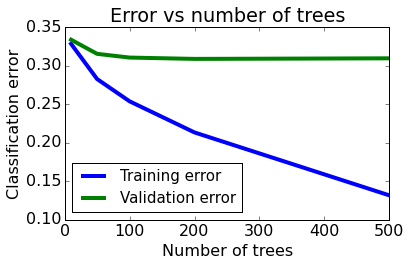

In [46]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')